# Inference and Hypothesis testing


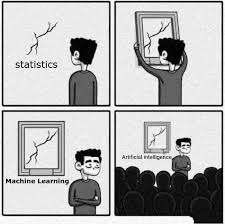



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inferential-Statistics" data-toc-modified-id="Inferential-Statistics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inferential Statistics</a></span><ul class="toc-item"><li><span><a href="#Sampling-distributions" data-toc-modified-id="Sampling-distributions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sampling distributions</a></span><ul class="toc-item"><li><span><a href="#Standard-Error" data-toc-modified-id="Standard-Error-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Standard Error</a></span></li><li><span><a href="#Confidence-interval" data-toc-modified-id="Confidence-interval-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Confidence interval</a></span></li></ul></li><li><span><a href="#The-central-limit-Theorem" data-toc-modified-id="The-central-limit-Theorem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The central limit Theorem</a></span></li><li><span><a href="#The-Bootstrap" data-toc-modified-id="The-Bootstrap-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The Bootstrap</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hypothesis testing</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#References-&amp;-further-materials" data-toc-modified-id="References-&amp;-further-materials-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References &amp; further materials</a></span></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import pandas as pd
np.random.seed(123)

# Let us welcome SciPy!
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta

## Inferential Statistics

In real life situations we only have access to samples of data, not to the entire population. Then, how can we draw conclussions about the underlying population as a whole? How confident can we be with this conclusions? The answer lies in the *Inferential Statistics*

### Sampling distributions

Imagine the "real" distribution of salaries in Spain is as follows: 

In [2]:
population_mean = 23646.50
population_std = 5000
population = 10000
mock_salaries = np.random.normal(population_mean, population_std, population)

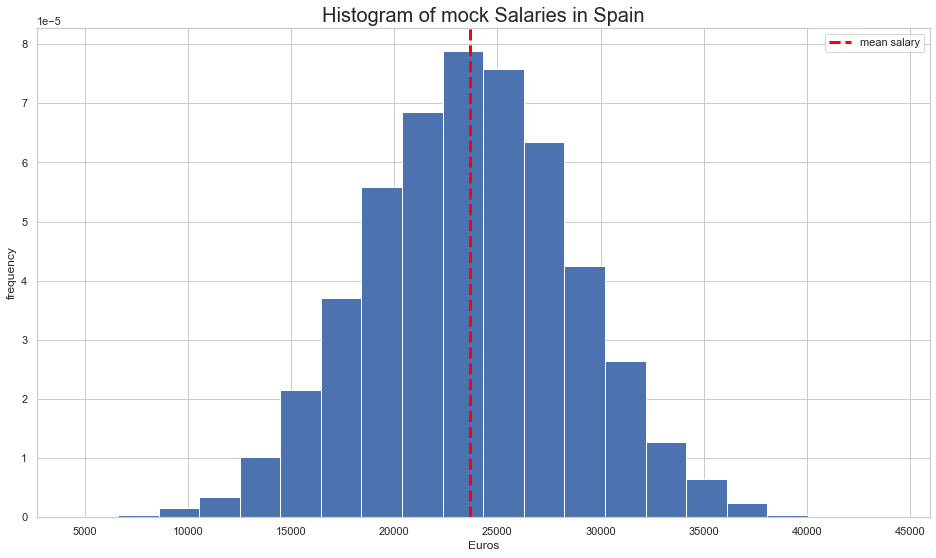

In [3]:
plt.hist(mock_salaries, bins=20, density=True)
plt.axvline(np.mean(mock_salaries),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean salary') # plot the mean
plt.title('Histogram of mock Salaries in Spain', size=20)
plt.xlabel('Euros')
plt.ylabel('frequency')
plt.legend()
plt.show()

What if you had to *infer* the mean salary based on a sample?

In [4]:
sample_size = 100
sample = np.random.normal(population_mean, population_std, sample_size)

In [5]:
print(f'Sample mean: {np.round(np.mean(sample))}, ', 
      f'Sample std: {np.round(np.std(sample))}')

Sample mean: 24175.0,  Sample std: 5215.0


Repeating this over and over would give us the **sampling distribution** (of the mean, in this case). With that, we can hace an idea of how good our estimate is.

**Exercise**
* Write a piece of code that draws 1000 samples of size 25 from the population of salaries.
* Record the average of each sample in a list
* Plot the distribution of the averages
* What is the average of the averages?

In [28]:
# Your code here
list_of_samples = []

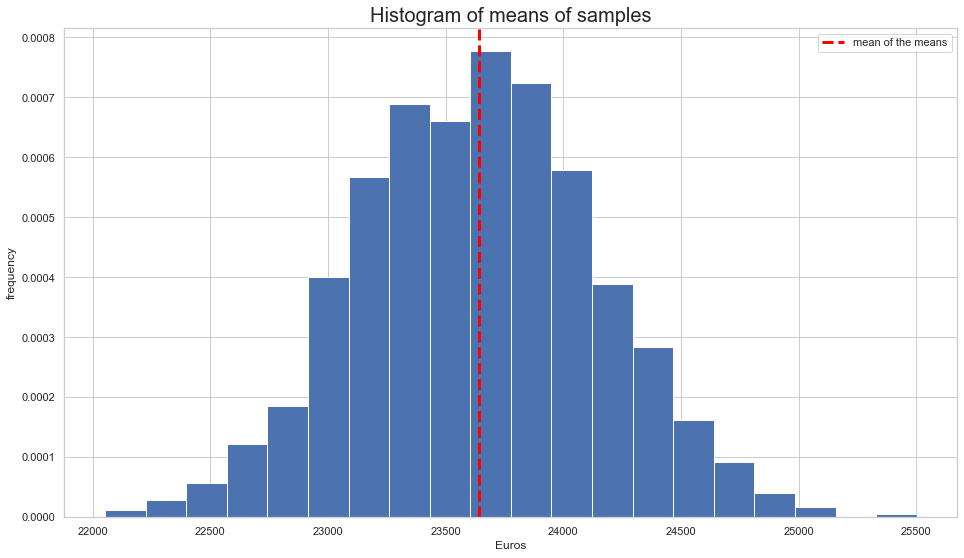

In [7]:
plt.hist(list_of_samples, bins=20, density=True)
plt.axvline(np.mean(list_of_samples),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean of the means') # plot the mean
plt.title('Histogram of means of samples', size=20)
plt.xlabel('Euros')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [8]:
print(f'The MEAN OF THE SAMPLING DISTRIBUTION is: {np.mean(list_of_samples)}')
print(f'The real mean of the population is: {np.mean(mock_salaries)}')

The MEAN OF THE SAMPLING DISTRIBUTION is: 23640.934265630272
The real mean of the population is: 23695.05946145798


#### Standard Error

In [9]:
print(f'The STANDARD ERROR of the sampling distribution is: {np.std(list_of_samples)}')

The STANDARD ERROR of the sampling distribution is: 507.63711531560887


The theory stablishes that:

$$SE = \hat\sigma /\sqrt{n} $$


In [10]:
# Exactly in the limit
std_error_of_mean = population_std / np.sqrt(sample_size)
std_error_of_mean

500.0

In [11]:
# Approximate in practice
empirical_standard_error = np.std(sample) / np.sqrt(sample_size)
empirical_standard_error

521.5028525859788

#### Confidence interval


It is  a range that includes a given fraction of the sampling distribution. Typicall values are 90%, 95%, and 99%. This proposes a range of plausible values for an unknown parameter (for example, the mean). 

The interval has an associated confidence level.  The confidence level represents the frequency (i.e. the proportion) of confidence intervals that contain the true value of the unknown population parameter across many independent experiments. 


**Remember:** 95% confidence interval does not mean 95% probability. (Bayesian confidence intervals can be interpreted that way though)

Taken mostly from [Wikipedia](https://en.wikipedia.org/wiki/Confidence_interval).
See also this blog from [Towardsdatascience](https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593).

The theory stablishes that the 95% CI can be obtained as:

$$\left[ \hat\mu -1.96 * SE, \hat\mu +1.96 * SE \right]$$

In [12]:
# Exactly in the limit
np.percentile(list_of_samples,[2.5,97.5])

array([22632.73059676, 24661.06555833])

In [13]:
# Approximate in practice
np.mean(sample)-1.96*(empirical_standard_error), np.mean(sample)+1.96*(empirical_standard_error)

(23153.070106883923, 25197.36128902096)

**Exercise (derived from my working experience)**

Imagine you want to know the success rate of calling a client to sign up for your product. You have called 100 individuals and 10 of them did sign up.

For every individual signing up you make 10 euros. Every call costs you 0.4 euros.



Hint: the confidence interval for a proportion is similar than for the mean, but using this formula for the standard error:

$$SE = \sqrt{\hat{p}(1-\hat{p})/n} $$

where $\hat{p}$ is the empirical fraction of success cases and $n$ is the number of trials

In [14]:
# Exercise test a proportion


It is important to remember that confidence intervals and standard errors
only quantify sampling error; that is, error due to measuring only part of the
population. The sampling distribution does not account for other sources of
error, notably **sampling bias** and **measurement error**. (From [Think Stats](http://greenteapress.com/thinkstats2/thinkstats2.pdf))

**NOTE**: Read this blog from [Towardsdatascience](https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593) to know how to calculate CI for other statistics.

### The central limit Theorem

Code snnipet extracted from [Geeks for Geeks](https://www.geeksforgeeks.org/python-central-limit-theorem/#:~:text=The%20definition%3A,from%20which%20we%20are%20sampling.&text=The%20distribution%20of%20the%20sample,as%20the%20sample%20size%20increases.)

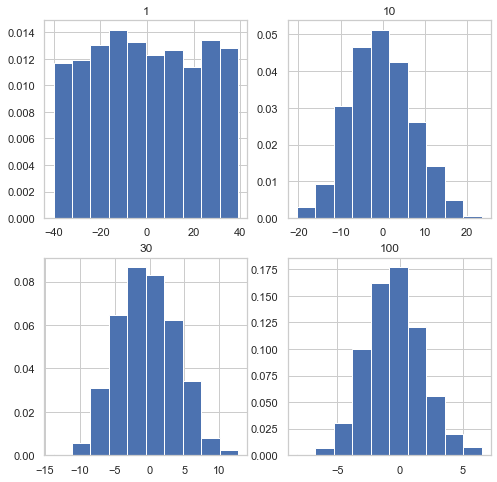

In [15]:
# number of sample 
num = [1, 10, 30, 100]   
# list of sample means 
means = []   
  
# Generating 1, 10, 30, 100 random numbers from -40 to 40 
# taking their mean and appending it to list means. 
for j in num: 
    # Generating seed so that we can get same result  
    # every time the loop is run... 
    np.random.seed(1) 
    x = [np.mean(np.random.randint(-40, 40, j)) for _i in range(1000)] 
    means.append(x) 

k = 0
# plotting all the means in one figure 
fig, ax = plt.subplots(2, 2, figsize =(8, 8)) 
for i in range(0, 2): 
    for j in range(0, 2): 
        # Histogram for each x stored in means 
        ax[i, j].hist(means[k], 10, density = True) 
        ax[i, j].set_title(label = num[k]) 
        k = k + 1

**Central Limit Theorem (CLT)**


Let $X_1,...,X_n$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^2$. Define
$$\bar{X} = \frac{1}{n} \sum_i x_i.$$

The CLT states that as $n$ goes to infinity that
$$\bar{X} \sim \mbox{N}(\mu,\sigma^2/n).$$

Or, put it in simpler words: **regardless of the shape of
the population distribution** of $X$, as the sample size $n$ gets larger,
the sampling distribution of $\bar{X}$ becomes increasingly closer to
normal, with mean $\mu$ and variance $\sigma^2 / n$. (As long as $\mu$ and $\sigma$ are finite quantities.)


### The Bootstrap

In real life we can not recreate the sampling distribution... we can infer the values of some statistics with tricks as the ones described above and the CTL. But: can we do something more general for *any* statistic?

In [16]:
skewed_distribution = np.random.beta(2,8,1000)

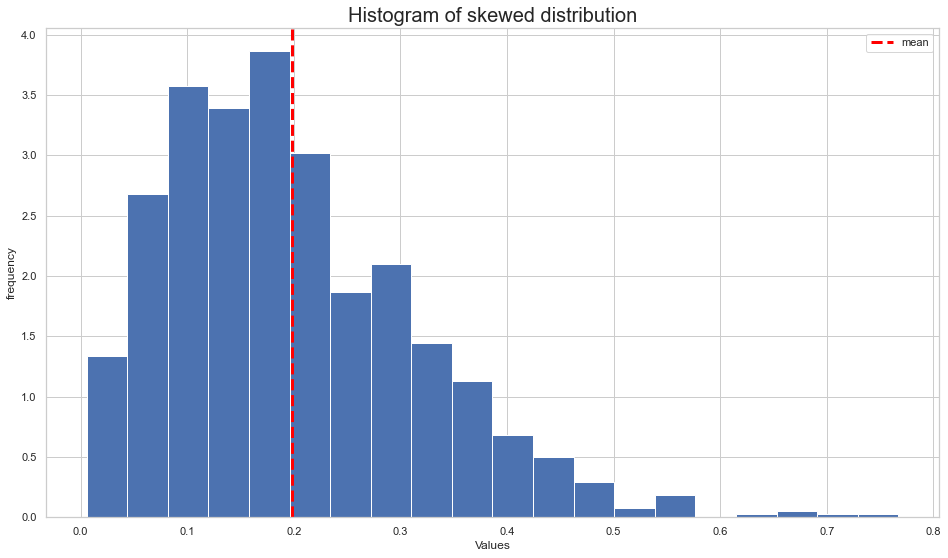

In [17]:
plt.hist(skewed_distribution, bins=20, density=True)
plt.axvline(np.mean(skewed_distribution),
            c="red",
            linewidth= 3.,
            linestyle='--',
            label='mean') # plot the mean
plt.title('Histogram of skewed distribution', size=20)
plt.xlabel('Values')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [18]:
# take a sample of 50 values
sample_size = 50
sample = np.random.beta(2,8, sample_size)

In [19]:
# using the CLT
estimate_mean = np.mean(sample)
estandard_error = np.std(sample)
CI = estimate_mean - 1.96*estandard_error / np.sqrt(sample_size), estimate_mean + 1.96*estandard_error / np.sqrt(sample_size)
print(f' Estimate of the mean: {np.round(estimate_mean, 2)}')
print(f' 95% CI of the mean: {np.round(CI[0], 2), np.round(CI[1], 2)}')
    

 Estimate of the mean: 0.23
 95% CI of the mean: (0.2, 0.27)


Using bootstrappin consits on recreating a *fake* sampling distribution by solely having one sample! Let´s use this to calculate in a different way the above estimation for the mean and its CI.

1. Take values *with replacement* from your original sample until you get a new *bootstrapped* sample with the same size as the original.

In [20]:
bootsrapped_sample = np.random.choice(sample, sample_size)
bootsrapped_sample

array([0.1326701 , 0.19366994, 0.20041498, 0.18292175, 0.29484978,
       0.19366994, 0.31179525, 0.20019123, 0.18832103, 0.03207292,
       0.12098015, 0.33001544, 0.18292175, 0.15399112, 0.29484978,
       0.34234556, 0.21694497, 0.18832103, 0.33945872, 0.37603283,
       0.53878005, 0.18940333, 0.13281346, 0.33945872, 0.53878005,
       0.53878005, 0.51471105, 0.20019123, 0.1688469 , 0.15399112,
       0.28351977, 0.09350787, 0.33001544, 0.01383037, 0.08676141,
       0.09176721, 0.20041498, 0.15399112, 0.27268114, 0.11880855,
       0.01383037, 0.2486281 , 0.18292175, 0.13281346, 0.4686628 ,
       0.32093656, 0.18832103, 0.25131896, 0.08676141, 0.31751919])

2. Calculate the statistic you want to compute with this new sample

In [21]:
np.mean(bootsrapped_sample)

0.23298411486361406

3. Repeat the process enough (10000) times so that you create a distribution of you statistic.

In [22]:
bootstrapped_sampling_distribution = [np.mean(np.random.choice(sample, sample_size)) for _ in range(10000) ]

4. Get the estimate and its CI 

In [23]:
mean = np.mean(bootstrapped_sampling_distribution)
CI = np.percentile(bootstrapped_sampling_distribution,[2.5,97.5])
print(f' Bootstrapped estimate of the mean: {np.round(mean, 2)}')
print(f' Bootstrapped 95% CI of the estimate: {np.round(CI[0], 2), np.round(CI[1], 2)}')

 Bootstrapped estimate of the mean: 0.23
 Bootstrapped 95% CI of the estimate: (0.2, 0.27)


**Exercise**

Use the bootsrap method to estimate the Median of the distribution above and its 90% confidence interval.

In [24]:
# your code here

**Note** Some [libraries in Python](https://github.com/cgevans/scikits-bootstrap) implement more sophisticated versions of Bootstrapping, but the idea is as simple and powerful as it looks like!

## Hypothesis testing

Adapted from [Think Stats](http://greenteapress.com/thinkstats2/thinkstats2.pdf):


The goal of classical hypothesis testing is to answer the question, “Given a
sample and an apparent effect, what is the probability of seeing such an effect
by chance?” Here’s how we answer that question:


* The first step is to quantify the size of the apparent effect by choosing a **test statistic**. 
* The second step is to define a **null hypothesis**, which is a model of the system based on the assumption that the apparent effect is not real (i.e that it can be due to chance).
* The third step is to compute a **p-value**, which is the probability of seeing the apparent effect if the null hypothesis is true.

* The last step is to interpret the result. If the p-value is low, the effectis said to be **statistically significant**, which means that it is unlikely to have occurred by chance. In that case we infer that the effect is more likely to appear in the larger population.

The logic of this process is similar to a proof by contradiction. To prove a mathematical statement, $A$, you assume temporarily that $A$ is false. If that assumption leads to a contradiction, you conclude that $A$ must actually be
true. Similarly, to test a hypothesis like, “This effect is real,” we assume, temporarily, that it is not. That’s the null hypothesis.
***

One of the great things about hypothesis testing is that once you understand the general procedure, you can simply look for the right test to perform depending on the effect you want to test --- of course, it is much better to really understand what you are doing... and we will do so for a couple of common examples.

**Example**

Your boss wants you to tell her if a given sample might is drawn from a normal distribution --- yes she is a statistician ;). She wants to be sure at least at the 90%.

In [25]:
sample = [0.11479671, 0.15892681, 0.49854235, 0.13681444, 0.05292543,
       0.22487946, 0.04756268, 0.18728333, 0.10440303, 0.33329199,
       0.3252868 , 0.12771644, 0.20205405, 0.04042936, 0.22512235,
       0.27517361, 0.04930002, 0.18011567, 0.17464921, 0.21332524,
       0.05786892, 0.08756611, 0.16236155, 0.18461355, 0.23804157,
       0.03703809, 0.20529165, 0.35202484, 0.34082362, 0.30516901,
       0.16744696, 0.09482297, 0.10324637, 0.18256127, 0.19225971,
       0.22853795, 0.32656764, 0.0369186 , 0.12217284, 0.11466913]

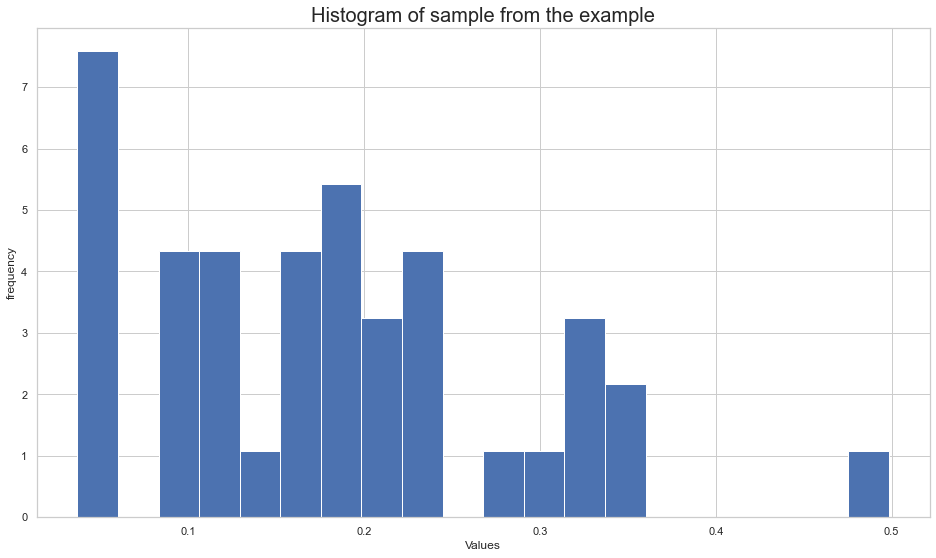

In [26]:
# it does not look much like it... but she wants a proof
plt.hist(sample, bins=20, density=True)
plt.title('Histogram of sample from the example', size=20)
plt.xlabel('Values')
plt.ylabel('frequency')
plt.show()

You find `scipy.stats.normaltest` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). It says:

"Test whether a sample differs from a normal distribution"


* **statistic**: s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest. (OK...)
* **null hypothesis** that a sample comes from a normal distribution

Then if the **p-value** returned by the function is smaller than 0.1 (the significance level that our boss wants) we can safely reject the null hypothesis -> the data do no come from a normal distribution. 

In [27]:
from scipy.stats import normaltest
k2, p = normaltest(sample)
confidence_level = 0.1 # this means that the statistc k2 lies wihtin the 90% CI around the expected mean under the null
print("p = {:g}".format(p))
if p < confidence_level:  
    print("The null hypothesis can be rejected --> very unlikely to come from a normal distribution")
else:
    print("The null hypothesis cannot be rejected --> it can come from a normal distribution")

p = 0.0643194
The null hypothesis can be rejected --> very unlikely to come from a normal distribution


## Summary 

**Topics**



**Students feedback**



## References & further materials


* [Think Stats](https://greenteapress.com/wp/think-stats-2e/)
* [Practical Statistics for Data Scientists](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/)
* [Online Statistics Book](http://onlinestatbook.com/2/sampling_distributions/sampling_distributions.pdf)